In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('car_evaluation.csv',header = None) # loading data 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data.columns = ['buying','maint','doors','persons','lug_boot','safety','target']
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data.isnull().any() # checking for null values

buying      False
maint       False
doors       False
persons     False
lug_boot    False
safety      False
target      False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [9]:
col_list = list(data.columns)

In [10]:
train, test = train_test_split(data,test_size = 0.2)

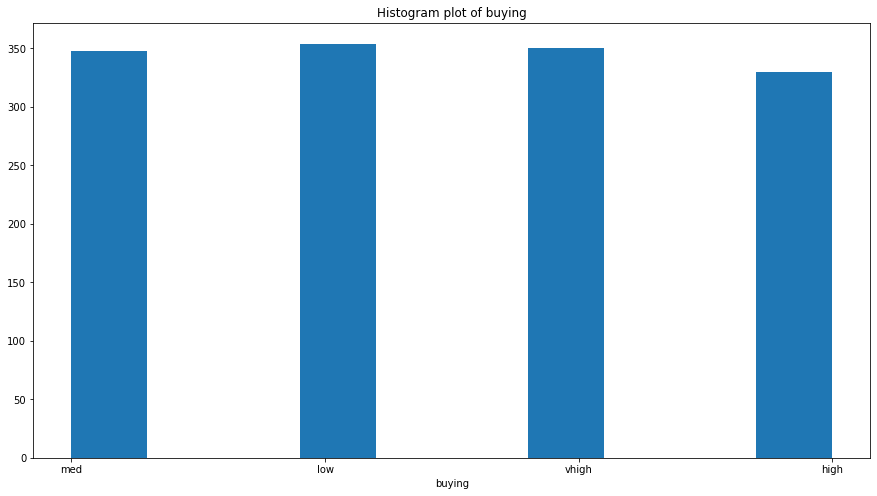

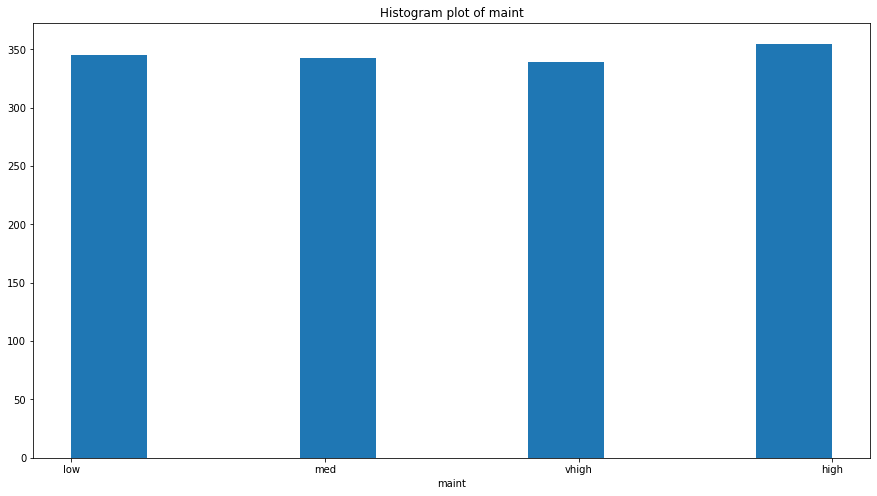

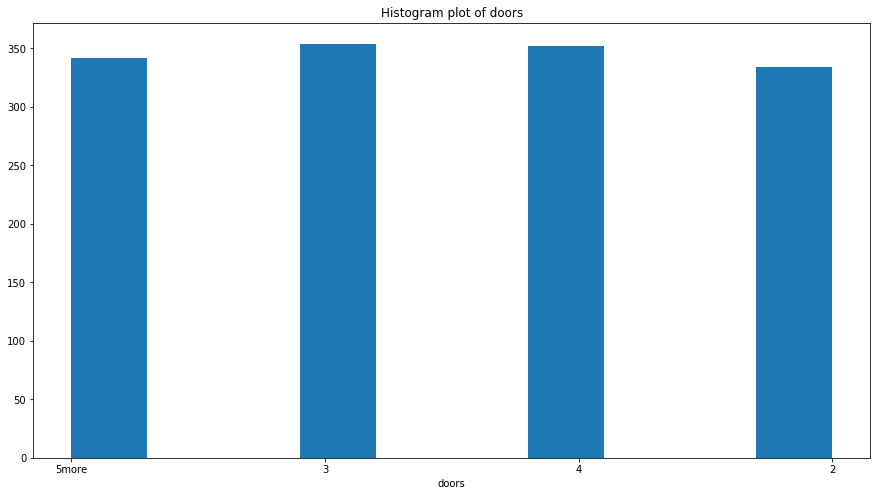

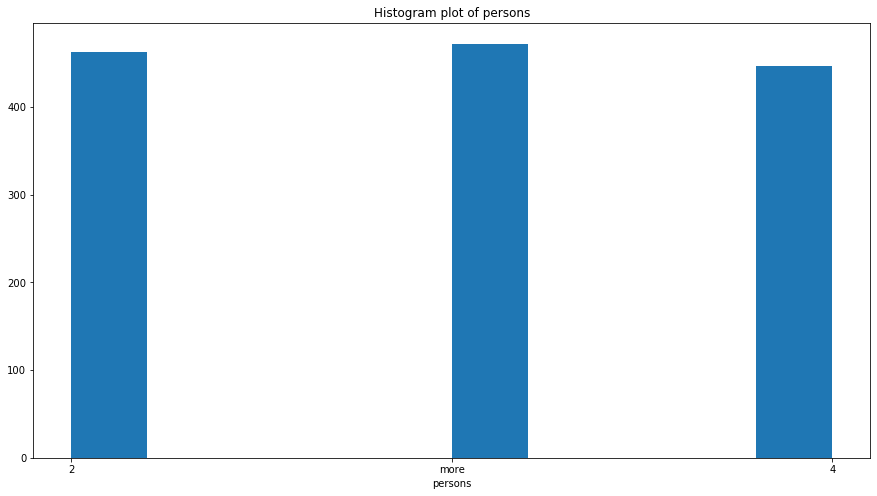

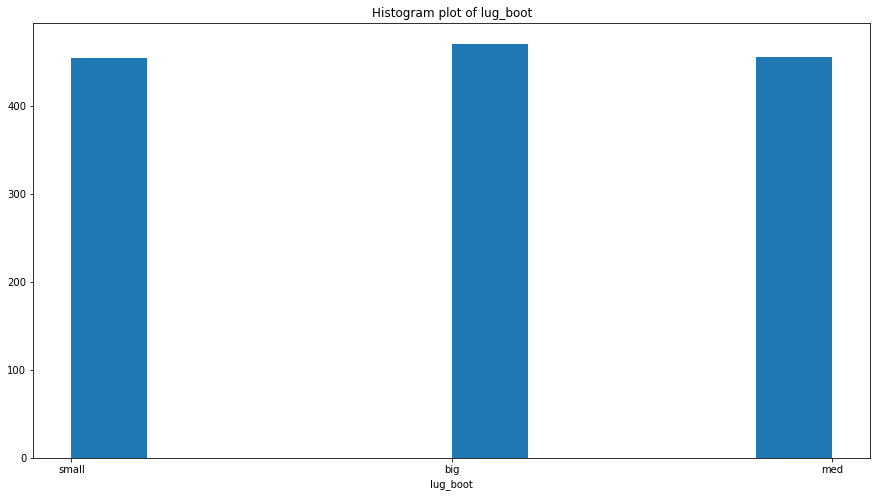

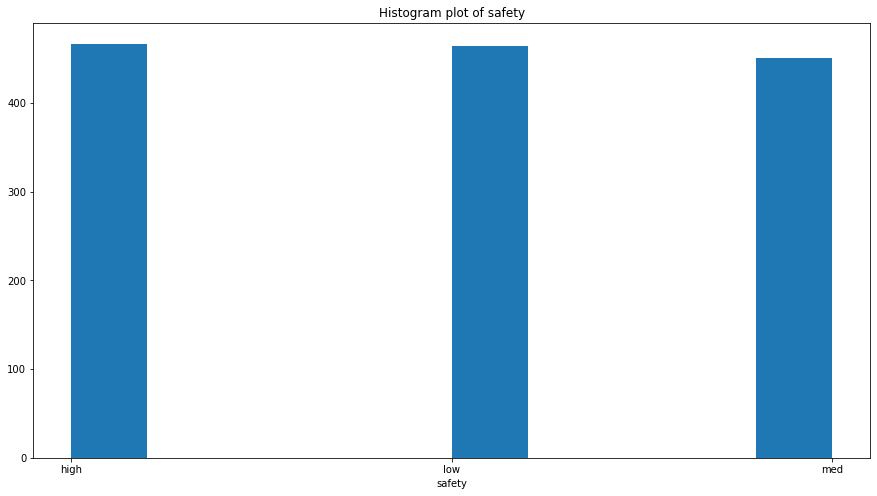

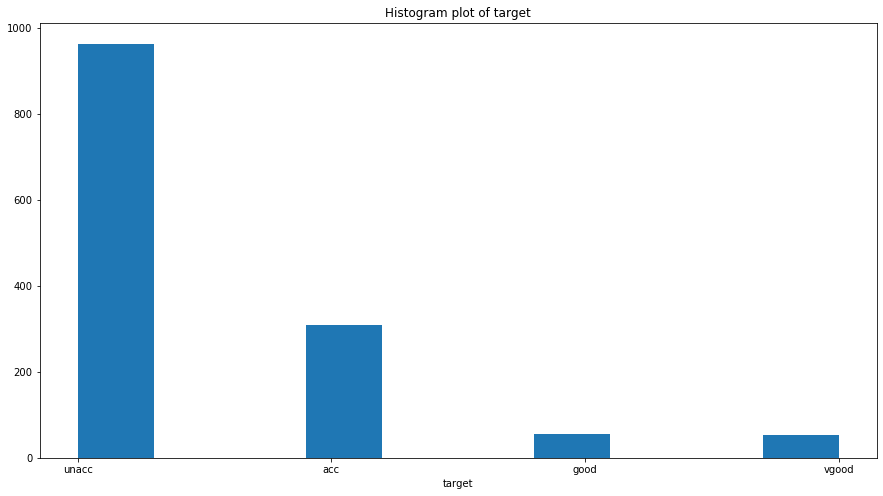

In [14]:
# Histograms of all features
for i in col_list:
    fig, ax = plt.subplots(figsize=(15,8))
    try:
        plt.hist(train[i])
        plt.title(f'Histogram plot of {i}')
        plt.xlabel(i)
        plt.savefig(f'images/hist_{i}.png')
        plt.show()
    except ValueError as ve:
        pass
    

In [15]:
display(data['lug_boot'].unique())
display(data['buying'].unique())
display(data['maint'].unique())
display(data['doors'].unique())
display(data['persons'].unique())
display(data['safety'].unique())
display(data['target'].unique())

array(['small', 'med', 'big'], dtype=object)

array(['vhigh', 'high', 'med', 'low'], dtype=object)

array(['vhigh', 'high', 'med', 'low'], dtype=object)

array(['2', '3', '4', '5more'], dtype=object)

array(['2', '4', 'more'], dtype=object)

array(['low', 'med', 'high'], dtype=object)

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [13]:
from collections import Counter

Counter({'low': 354, 'vhigh': 350, 'med': 348, 'high': 330})


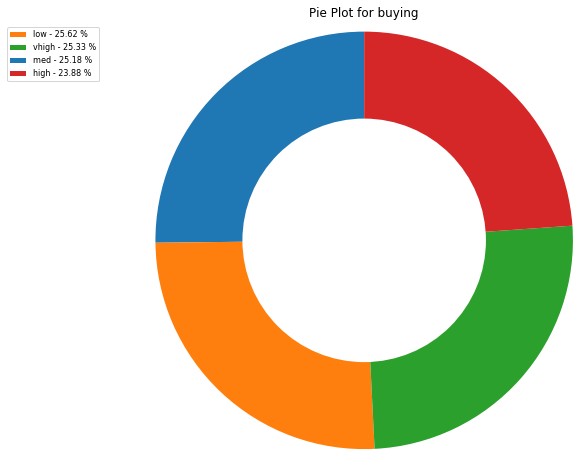

Counter({'high': 355, 'low': 345, 'med': 343, 'vhigh': 339})


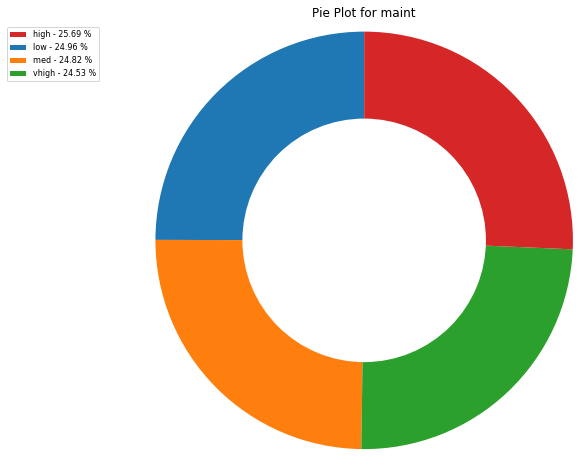

Counter({'3': 354, '4': 352, '5more': 342, '2': 334})


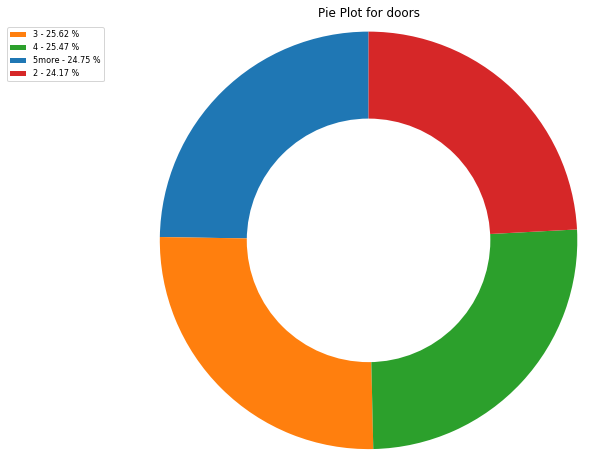

Counter({'more': 472, '2': 463, '4': 447})


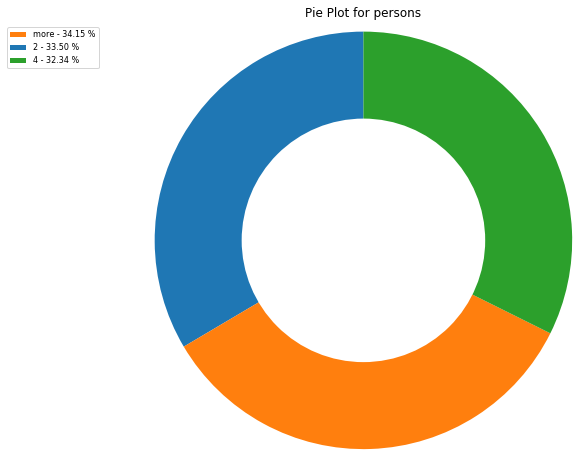

Counter({'big': 471, 'med': 456, 'small': 455})


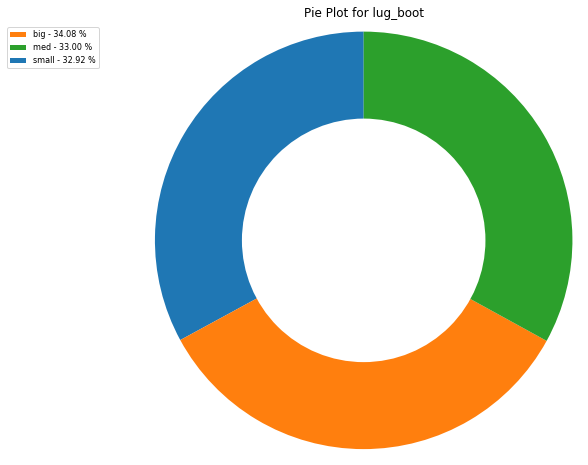

Counter({'high': 467, 'low': 464, 'med': 451})


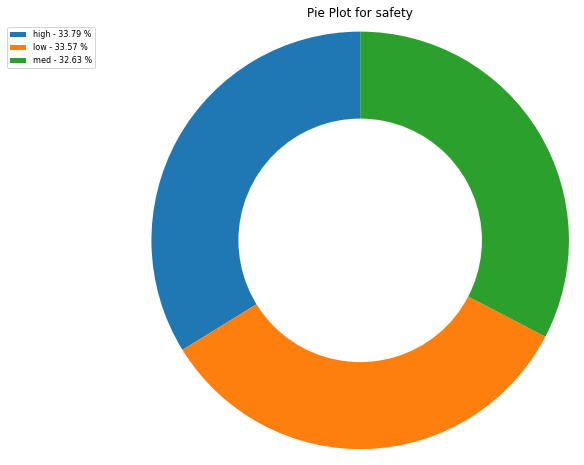

Counter({'unacc': 964, 'acc': 309, 'good': 56, 'vgood': 53})


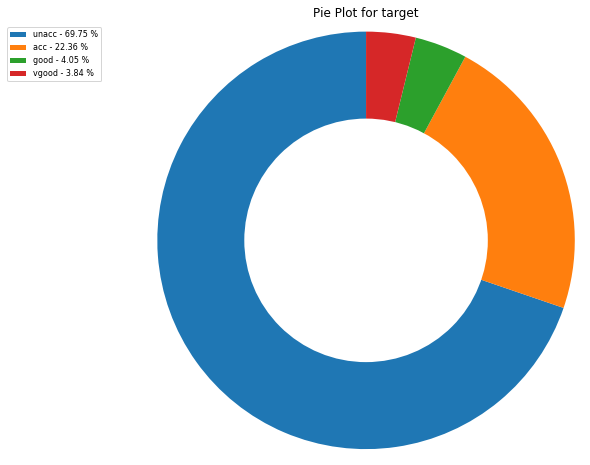

In [16]:
# Pie charts for the categorical features
for i in list(train.columns):
    fig, ax = plt.subplots(figsize=(8,8))
    #ax.set_title('Pie Chart of male and female who did not survive')
    #if i == 'Native':
    dct = Counter(train[i])
    y = np.array(list(dct.values()))
    x = np.array(list(dct.keys()))
    print(dct)
    #print(y)
#     ax.pie(dct.values(),labels = list(dct.keys()),autopct='%1.1f%%',pctdistance = 0.5,shadow=True, startangle=90)
#     ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
   
    porcent = 100.*y/y.sum()
    #print(y)
    
#     centre_circle = plt.Circle((0,0),0.70,fc='white')
#     fig = plt.gcf()
#     fig.gca().add_artist(centre_circle)
    patches, texts = plt.pie(y, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    lgd = ax.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f'Pie Plot for {i}')
    #plt.savefig(f'images/pie_{i}.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

#         plt.show()
#         dct = Counter(data1[i])
#         ax.pie(dct.values(), labels = list(dct.keys()),autopct='%1.1f%%',shadow=True, startangle=90)
#         ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#         #plt.savefig('images/pie_mf_0.png')

#         plt.show()

In [17]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'], dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [19]:
train.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'], dtype='object')

In [20]:
test.head()

,buying,maint,doors,persons,lug_boot,safety,target
487,high,vhigh,4,2,small,med,unacc
287,vhigh,med,4,4,big,high,acc
780,high,low,2,more,big,low,unacc
1371,low,vhigh,4,more,med,low,unacc
1725,low,low,5more,more,big,low,unacc


In [21]:
train.head()

,buying,maint,doors,persons,lug_boot,safety,target
1271,med,low,5more,2,small,high,unacc
1599,low,med,5more,2,big,low,unacc
1385,low,vhigh,5more,2,big,high,unacc
375,vhigh,low,3,more,big,low,unacc
1370,low,vhigh,4,more,small,high,acc


In [22]:
X_train = train.drop(columns=['target'])
y_train = train['target']
X_test = test.drop(columns=['target'])
y_test = test['target']

In [23]:
# Ordinal Encoding categorical features
encoded_trainX = pd.DataFrame()
encoded_testX = pd.DataFrame()
#for col in X_train.columns:
enc = OrdinalEncoder()
enc.fit(X_train)
encoded_trainX = pd.DataFrame(enc.transform(X_train))
encoded_testX = pd.DataFrame(enc.transform(X_test))
enc = LabelEncoder()
enc.fit(y_train)
enc_trainY = enc.transform(y_train)
enc_testY = enc.transform(y_test)

In [24]:
encoded_trainX.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
encoded_testX.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [25]:
encoded_trainX.head()

,buying,maint,doors,persons,lug_boot,safety
0,2.0,1.0,3.0,0.0,2.0,0.0
1,1.0,2.0,3.0,0.0,0.0,1.0
2,1.0,3.0,3.0,0.0,0.0,0.0
3,3.0,1.0,1.0,2.0,0.0,1.0
4,1.0,3.0,2.0,2.0,2.0,0.0


In [26]:
enc.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf.feature_names_in_

array(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
      dtype=object)

In [50]:
clf.score(encoded_testX,enc_testY) # accuracy on train data

0.9739884393063584

In [59]:
# hyper-parameters to be chosen by cross-validation
param_grid = {
                 'n_estimators': [50,100,200,500],
                 'max_depth': [15,15,50]
             }


In [53]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()

In [60]:
grid_clf = GridSearchCV(clf, param_grid, cv=5)
grid_clf.fit(encoded_trainX, enc_trainY)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [15, 15, 50],
                         'n_estimators': [50, 100, 200, 500]})

In [62]:
# result by gridsearch
result = pd.DataFrame(grid_clf.cv_results_).sort_values(by='rank_test_score')
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.293602,0.004149,0.026223,0.000185,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.963899,0.992780,0.960145,0.978261,0.963768,0.971771,0.012204,1
9,0.147744,0.001720,0.014727,0.001435,50,100,"{'max_depth': 50, 'n_estimators': 100}",0.971119,0.992780,0.960145,0.963768,0.971014,0.971765,0.011328,2
7,0.721624,0.005094,0.066509,0.004574,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.974729,0.989170,0.963768,0.963768,0.967391,0.971765,0.009579,3
8,0.081689,0.009393,0.008556,0.000882,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.956679,0.992780,0.960145,0.978261,0.967391,0.971051,0.013138,4
11,0.719613,0.007124,0.062983,0.000520,50,500,"{'max_depth': 50, 'n_estimators': 500}",0.963899,0.992780,0.963768,0.971014,0.963768,0.971046,0.011219,5
1,0.161489,0.015420,0.014435,0.000861,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.971119,0.996390,0.960145,0.978261,0.949275,0.971038,0.016045,6
3,0.722188,0.003506,0.096992,0.064231,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.974729,0.992780,0.956522,0.963768,0.967391,0.971038,0.012355,6
10,0.295897,0.014517,0.026210,0.000081,50,200,"{'max_depth': 50, 'n_estimators': 200}",0.967509,0.992780,0.960145,0.963768,0.967391,0.970319,0.011553,8
2,0.289424,0.002073,0.026118,0.000197,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.974729,0.989170,0.963768,0.963768,0.960145,0.970316,0.010622,9
5,0.145912,0.000963,0.013933,0.000117,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.967509,0.981949,0.967391,0.963768,0.967391,0.969602,0.006335,10


In [66]:
clf = RandomForestClassifier(max_depth=15,n_estimators = 200)
clf.fit(encoded_trainX,enc_trainY)
display(clf.score(encoded_trainX,enc_trainY)) # accuracy on train data
display(clf.score(encoded_testX,enc_testY)) # accuracy on test data

1.0

0.9739884393063584

In [70]:
result.to_csv('gridsearch.csv', float_format='%.3f')

In [64]:
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"


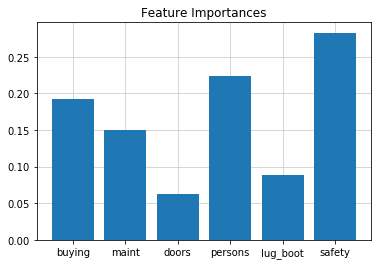

In [67]:
fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(numpy.arange(0, 1, 0.1))
#ax.set_yticks(numpy.arange(0, 1., 0.1))
plt.bar(list(encoded_trainX.columns),clf.feature_importances_)
#plt.grid()
ax.set_axisbelow(True)
ax.set_title('Feature Importances')
plt.savefig('images/feat_imp.png')
plt.show()

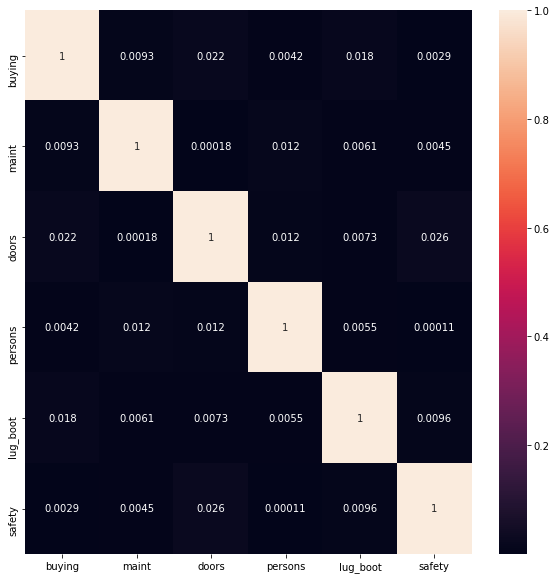

In [36]:
# Correlation between features
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(abs(pd.DataFrame(encoded_trainX).corr()),annot=True)
plt.savefig('images/corr.png')
plt.show()

In [ ]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html#sphx-glr-auto-examples-ensemble-plot-forest-iris-py